# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import datetime
import matplotlib.dates as mdate

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key

# Counters
city_counter = 1
set_counter = 1

# Create the lists to hold relative data
cities_list= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Started")

# Create a query url for each city in the cities list to get json response
for i, city in enumerate(cities):
    
    # Group cities as sets of 50s
    if (i % 50 == 0 and i >= 50):
        set_counter += 1
        city_counter = 1
         
    # Create API url for each city
    query_url = base_url +"&q=" + city
    
    # Get json respose for each city
    response = requests.get(query_url).json()
    
    # Print the results 
    print(f"Processing Record {city_counter} of Set {set_counter} | {city}")
    
    # Increase city counter
    city_counter += 1
    
   # Add the values to the lists
    try:       
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        cities_list.append(response["name"])
    except:
        print("City not found. Skipping...")
        pass
        
print("Completed")

Started
Processing Record 1 of Set 1 | airai
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | mackay
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | belmonte
Processing Record 9 of Set 1 | bon air
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | klaksvik
Processing Record 12 of Set 1 | balta
Processing Record 13 of Set 1 | malanje
Processing Record 14 of Set 1 | guerrero negro
Processing Record 15 of Set 1 | hovd
Processing Record 16 of Set 1 | zhigansk
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | richards bay
Processing Record 21 of Set 1 | mareeba
Processing Record 22 of Set 1 | mentok
City not found. Skipping...
Processing Record 23

Processing Record 39 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 4 | kampong chhnang
Processing Record 41 of Set 4 | erhlin
City not found. Skipping...
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 44 of Set 4 | severo-kurilsk
Processing Record 45 of Set 4 | berdigestyakh
Processing Record 46 of Set 4 | kargasok
Processing Record 47 of Set 4 | kushima
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | clyde river
Processing Record 50 of Set 4 | raahe
Processing Record 1 of Set 5 | henties bay
Processing Record 2 of Set 5 | guilin
Processing Record 3 of Set 5 | nador
Processing Record 4 of Set 5 | dubenskiy
City not found. Skipping...
Processing Record 5 of Set 5 | ahipara
Processing Record 6 of Set 5 | evensk
Processing Record 7 of Set 5 | nago
Processing Record 8 of Set 5 | dalbandin
Processing Record 9 of Set 5 | san ramon
Processing Record 10 of Set 5 | maraw

Processing Record 29 of Set 8 | banjar
Processing Record 30 of Set 8 | soma
Processing Record 31 of Set 8 | leeton
Processing Record 32 of Set 8 | yablonovo
Processing Record 33 of Set 8 | meulaboh
Processing Record 34 of Set 8 | namatanai
Processing Record 35 of Set 8 | tongren
Processing Record 36 of Set 8 | mabaruma
Processing Record 37 of Set 8 | el faiyum
City not found. Skipping...
Processing Record 38 of Set 8 | changji
Processing Record 39 of Set 8 | tabuk
Processing Record 40 of Set 8 | lasa
Processing Record 41 of Set 8 | poplar bluff
Processing Record 42 of Set 8 | elizabeth city
Processing Record 43 of Set 8 | sibolga
Processing Record 44 of Set 8 | calama
Processing Record 45 of Set 8 | talnakh
Processing Record 46 of Set 8 | wewak
Processing Record 47 of Set 8 | maraba
Processing Record 48 of Set 8 | muzaffarabad
Processing Record 49 of Set 8 | port macquarie
Processing Record 50 of Set 8 | ossora
Processing Record 1 of Set 9 | xining
Processing Record 2 of Set 9 | samusu

Processing Record 18 of Set 12 | tchollire
Processing Record 19 of Set 12 | singkang
Processing Record 20 of Set 12 | ferkessedougou
Processing Record 21 of Set 12 | lysyanka
Processing Record 22 of Set 12 | nouadhibou
Processing Record 23 of Set 12 | kihei
Processing Record 24 of Set 12 | arica
Processing Record 25 of Set 12 | kostyantynivka
Processing Record 26 of Set 12 | miles city
Processing Record 27 of Set 12 | xai-xai
Processing Record 28 of Set 12 | cap-aux-meules
Processing Record 29 of Set 12 | tura
Processing Record 30 of Set 12 | grass valley
Processing Record 31 of Set 12 | krasnoyarsk
Processing Record 32 of Set 12 | gat
Processing Record 33 of Set 12 | talas
Processing Record 34 of Set 12 | green river
Processing Record 35 of Set 12 | eldikan
City not found. Skipping...
Processing Record 36 of Set 12 | tabarqah
City not found. Skipping...
Processing Record 37 of Set 12 | mandalgovi
Processing Record 38 of Set 12 | fukue
Processing Record 39 of Set 12 | los llanos de ari

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary to keep data 
weather_data = {
     "City": cities_list,
     "Cloudiness": cloudiness,
     "Country": country,
     "Date": date,
     "Humidity": humidity,
     "Lat": lat,
     "Lng": lng,
     "Max Temp": max_temp,
     "Wind Speed": wind_speed    
 }

# Create the data frame and count variables for each columns
weather_df = pd.DataFrame(weather_data)
weather_df.count()


City          557
Cloudiness    557
Country       557
Date          557
Humidity      557
Lat           557
Lng           557
Max Temp      557
Wind Speed    557
dtype: int64

In [5]:
#export to csv
# Note to avoid any issues later, use encoding="utf-8"
weather_df.to_csv("../cities.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

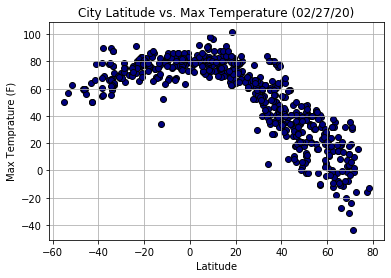

In [15]:
# Create a scatter plot for latitude and temprature
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker = "o", facecolor = "navy", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid(True)

# Show plot
plt.show()


#### Latitude vs. Humidity Plot

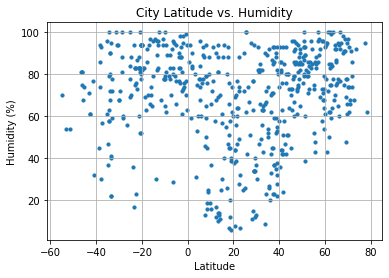

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)



# Show plot
plt.show()


#### Latitude vs. Cloudiness Plot

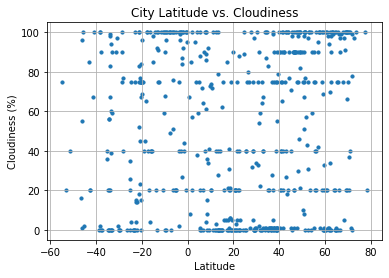

In [13]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

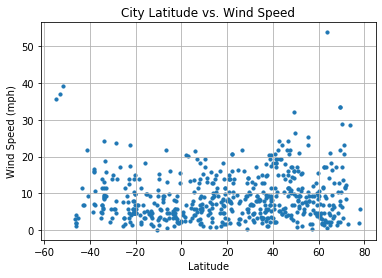

In [14]:
#Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)


# Show plot
plt.show()